1. Download and read the dataset "dataset.csv" and apply PCA for generating 10  principal components. Plot first three components of the PCA.

In [2]:
#Importing Packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
#Loading the dataset
data = pd.read_csv("/Users/likith/Library/CloudStorage/OneDrive-Personal/Deakin University/Trimester 3/SIT720 - Machine Learning/Assesments/Week 4/Assignment 4.1P/dataset.csv")
data.head()

,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,d 5101-1,d 5101-2,...,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,class6
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,class6
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,class6


In [4]:
#Checking for any null value
data.isnull().sum()

d 5100-0    0
d 5100-1    0
d 5100-2    0
d 5100-3    0
d 5100-4    0
           ..
d 571-3     0
d 571-4     0
d 571-8     0
d 571-9     0
Classes     0
Length: 204, dtype: int64

In [5]:
#Applying LabelEncoding for the feature "CLASSES"
LE = LabelEncoder()
data['Classes'] = LE.fit_transform(data['Classes'])
data.head()

,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,d 5101-1,d 5101-2,...,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5


In [6]:
#Standardizing the data
"""
We use StandardScaling because in the upcoming questions we need to find variance of the data and this scaling is commonly used while performing PCA,
and PCA works best when the data is standardized
"""
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
#Creating a PCA object and fitting the data
pca = PCA(n_components=10)
p_comp = pca.fit_transform(data_scaled)

/var/folders/vf/ppwlscqn5njg0zhf_01gx9ph0000gn/T/ipykernel_52064/1362014175.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axis.scatter(


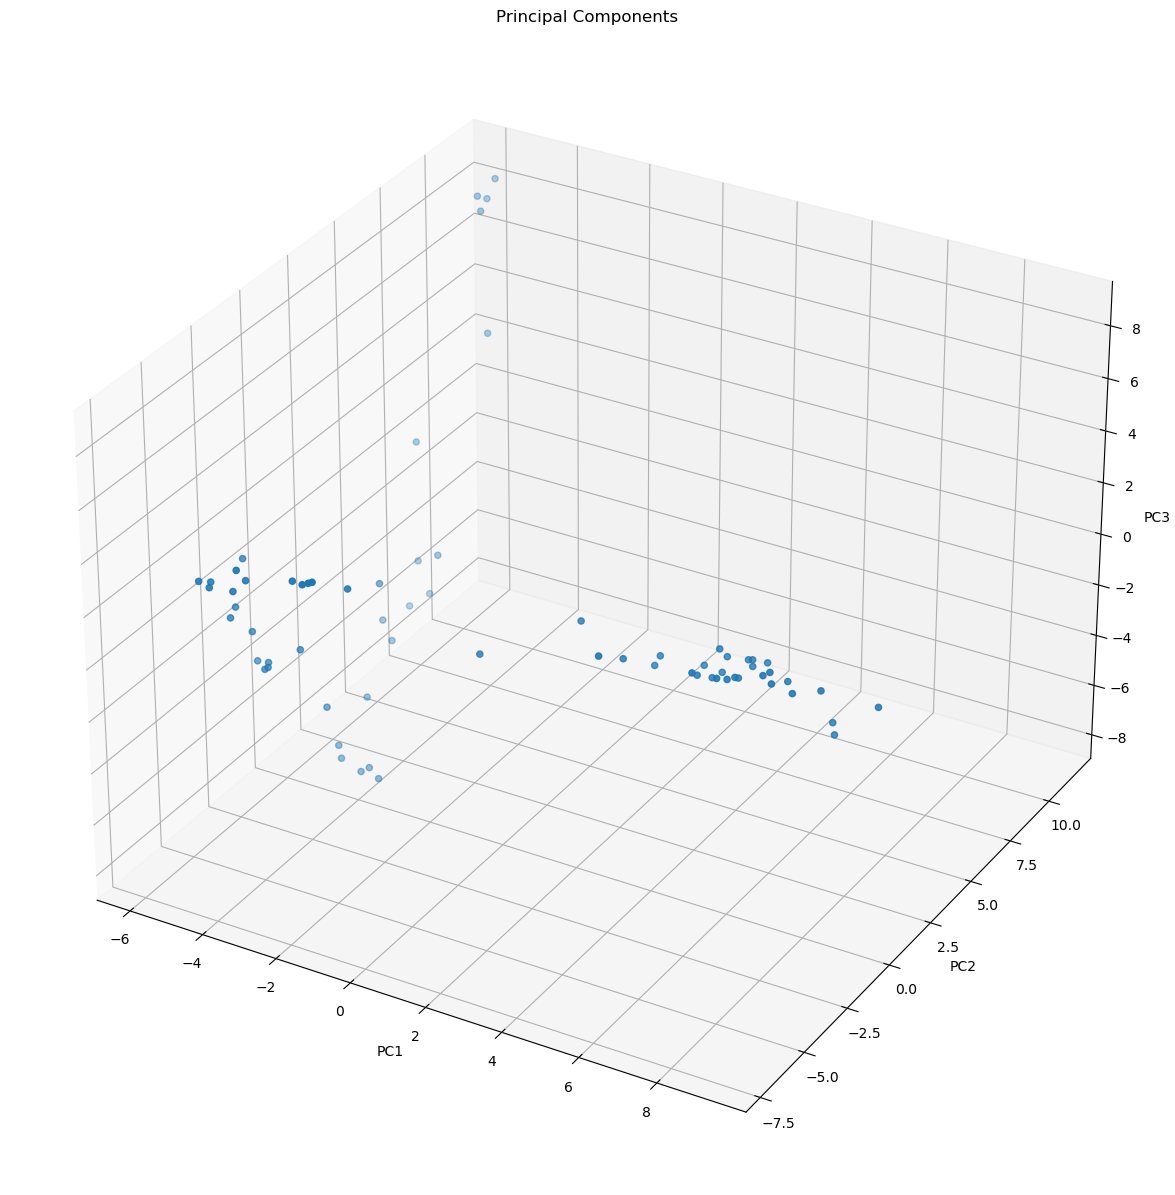

In [9]:
#Plotting the PCA in a 3D Scatter Plot
figure = plt.figure(figsize=(15, 15))
axis = figure.add_subplot(111, projection='3d')

axis.scatter(
    p_comp[:, 0],
    p_comp[:, 1],
    p_comp[:, 2],
    cmap=plt.get_cmap("viridis"),
    s=20
)
axis.set_title("Principal Components")
axis.set_xlabel("PC1")
axis.set_ylabel("PC2")
axis.set_zlabel("PC3")

plt.show()

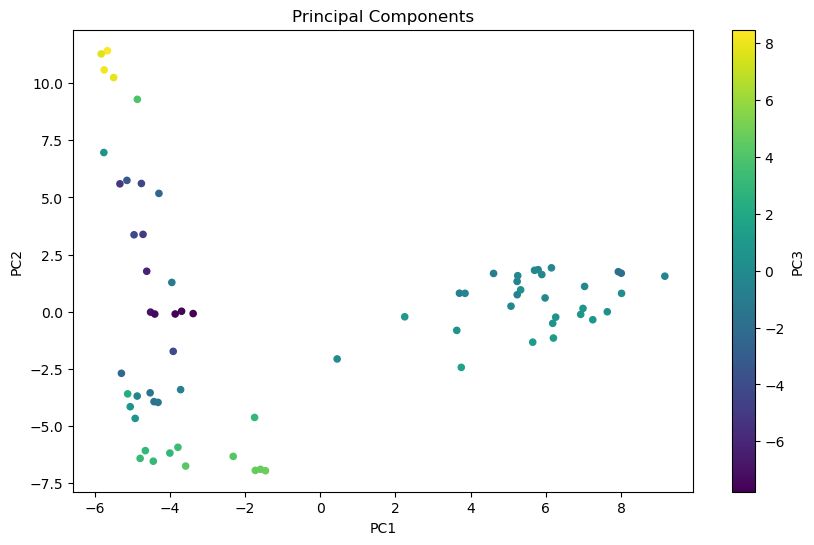

In [10]:
#Plotting the figure in a 2D Scatter plot using the 3 component as an color
plt.figure(figsize=(10, 6))
plt.scatter(
    p_comp[:, 0],
    p_comp[:, 1],
    c=p_comp[:, 2],  # Color based on third component
    cmap=plt.get_cmap("viridis"),
    s=20
)
plt.title("Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="PC3")
plt.show()

2. What is the variance (%) covered by first 5 components?  How is this percentage of variance computed?

In [11]:
#using explained_variance_ratio to find percentage of variance explained by each principal components
variance_ratio = pca.explained_variance_ratio_

# Calculate the variance covered by the first 5 components
#variance_covered_by_first_5 = sum(variance_ratio[:5]) * 100
print("The variance of the first 5 components are: ",sum(variance_ratio[:5]) * 100)

The variance of the first 5 components are:  52.28082538128339


3. Is there any correlation between these five components?

In [13]:
print(np.corrcoef(p_comp[:5, :]))

[[1.         0.79355789 0.67895538 0.65858067 0.21913499]
 [0.79355789 1.         0.90367959 0.92842914 0.57686657]
 [0.67895538 0.90367959 1.         0.81647666 0.60938413]
 [0.65858067 0.92842914 0.81647666 1.         0.55898231]
 [0.21913499 0.57686657 0.60938413 0.55898231 1.        ]]


Yes, there is some relationship between the first five major components. This is because the principal components are derived from the original features, which are associated with one another.
Because the primary components are always exactly associated with themselves, the diagonal elements of the matrix in the matrix presented below are all 1. The matrix's off-diagonal elements are the correlations between the various primary components.


4. Apply t-SNE (method exact) on the same dataset for same number of components used in PCA and plot first three components.

In [14]:
#Applying t - Distributed Stochastic Neighbour Embedding with 10 components
#Usually we select n_components = 2 for 2D scatter plot and n_components = 3 for 3d scatter plot
tsne = TSNE(n_components=10, method='exact', random_state=0)
t_comp = tsne.fit_transform(data_scaled)

/var/folders/vf/ppwlscqn5njg0zhf_01gx9ph0000gn/T/ipykernel_52064/3165681711.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


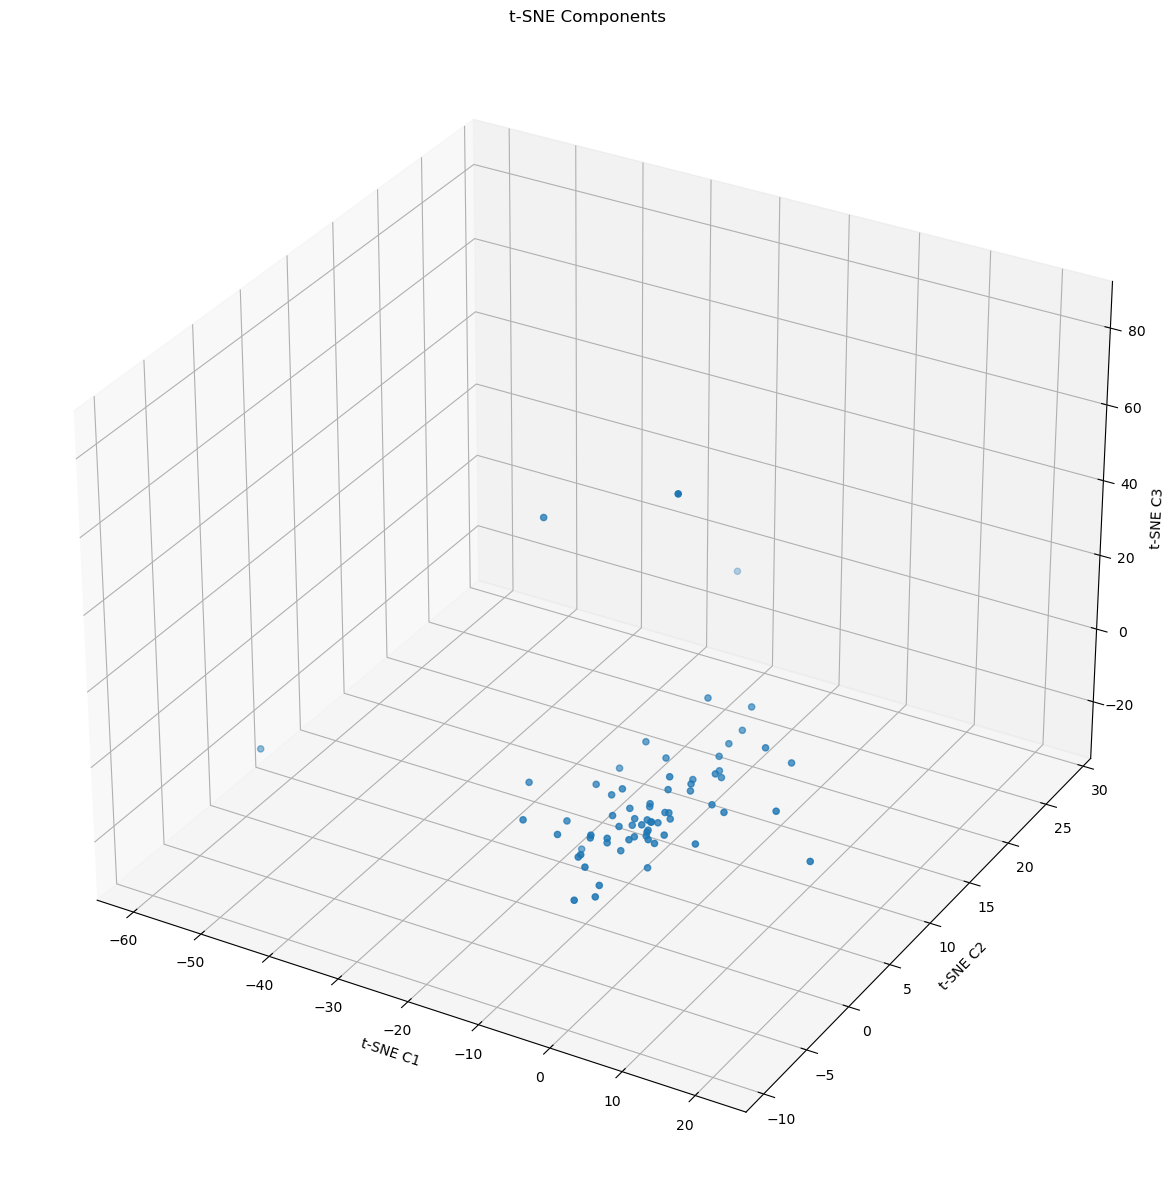

In [15]:
#Plotting the first three components
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    t_comp[:, 0],
    t_comp[:, 1],
    t_comp[:, 2],
    cmap=plt.get_cmap("viridis"),
    s=20
)
ax.set_title("t-SNE Components")
ax.set_xlabel("t-SNE C1")
ax.set_ylabel("t-SNE C2")
ax.set_zlabel("t-SNE C3")

plt.show()

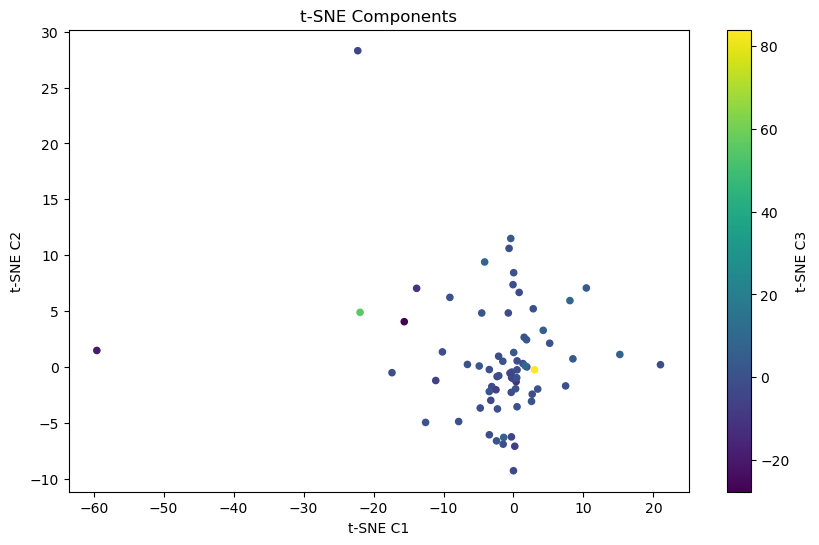

In [16]:
#Plotting the figure in a 2D Scatter plot using the 3 component as an color
plt.figure(figsize=(10, 6))
plt.scatter(
    t_comp[:, 0],
    t_comp[:, 1],
    c=t_comp[:, 2],  # Color based on third component
    cmap=plt.get_cmap("viridis"),
    s=20
)
plt.title("t-SNE Components")
plt.xlabel("t-SNE C1")
plt.ylabel("t-SNE C2")
plt.colorbar(label="t-SNE C3")
plt.show()

5. Report the comparison between the kmeans results obtained using t-SNE and PCA.

/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/an

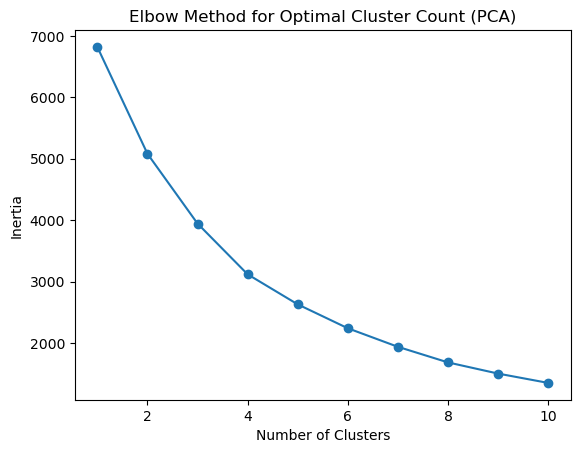

In [17]:
#Finding optimal number of cluster using elbow method for PCA
pca_inertia = []
pca_values = range(1, 11)  # Try different numbers of clusters

for k in pca_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(p_comp)
    pca_inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(pca_values, pca_inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Cluster Count (PCA)")
plt.show()

/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/an

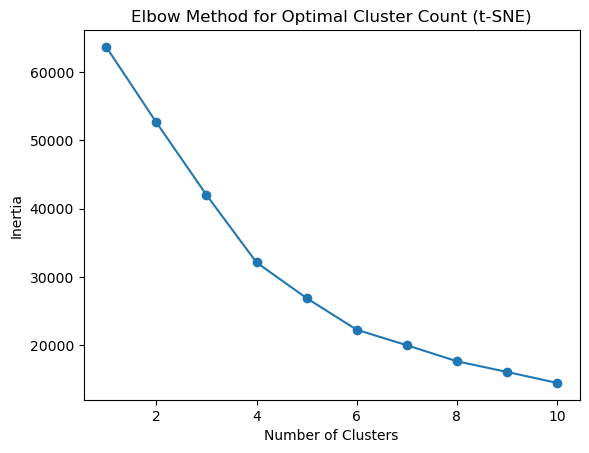

In [18]:
#Finding optimal number of cluster using elbow method for t-SNE
tsne_inertia = []
tsne_values = range(1, 11)  # Try different numbers of clusters

for k in tsne_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(t_comp)
    tsne_inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(tsne_values, tsne_inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Cluster Count (t-SNE)")
plt.show()

In [19]:
#Applying KMeans for PCA and t-SNE
kmeans_pca = KMeans(n_clusters=4, random_state=0)
kmeans_tsne = KMeans(n_clusters=4, random_state=0)
labels_pca = kmeans_pca.fit_predict(p_comp)
labels_tsne = kmeans_tsne.fit_predict(t_comp)

/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
#Calculating the silhoutte_score for PCA and t-SNE
print("The Silhouette Score for PCA is: ", silhouette_score(data_scaled, labels_pca))
print("The Silhouette Score for t-SNE is: ", silhouette_score(data_scaled, labels_tsne))

The Silhouette Score for PCA is:  0.22144212478225617
The Silhouette Score for t-SNE is:  -0.1788836342575934


We can see that the sil score for PCA and t-SNE is totally different and the sil score for t-SNE has a negative sil score meaning might be related to High dimensionality, Noisy Data, Complex Cluster shapes or incorrect clustering algorithms.